In [ ]:
from google.colab import files
uploaded = files.upload()


Saving advertising.csv to advertising.csv


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("advertising.csv")

print(data.head())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


FINDING NULL VALUE

In [ ]:
print(data.isnull().sum())


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


DESCRIBING THE DATA

In [ ]:
print(data.describe())


               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


VISHUALIZATION OF DATA

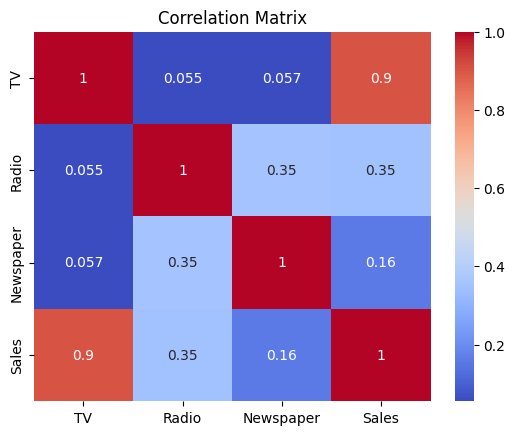

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


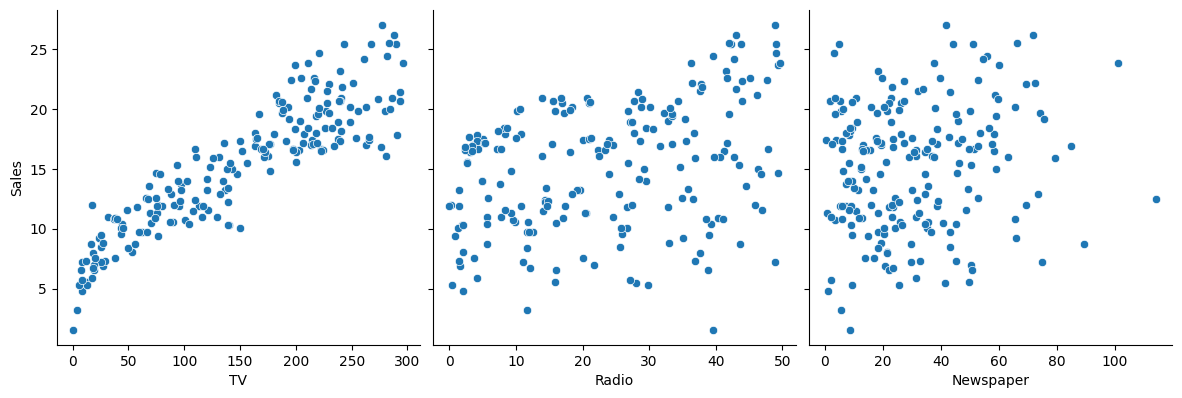

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()


PREPARE OF DATA

In [ ]:
from sklearn.model_selection import train_test_split
X = data[['TV', 'Radio', 'Newspaper']]  # Features
y = data['Sales']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


TRAINING THE DATA AND PREDICTION


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(feature_importance)


     Feature  Coefficient
0         TV     0.054509
1      Radio     0.100945
2  Newspaper     0.004337


MODEL EVALUATION


Mean Absolute Error (MAE): 1.2748262109549338
R-squared Score: 0.9059011844150826


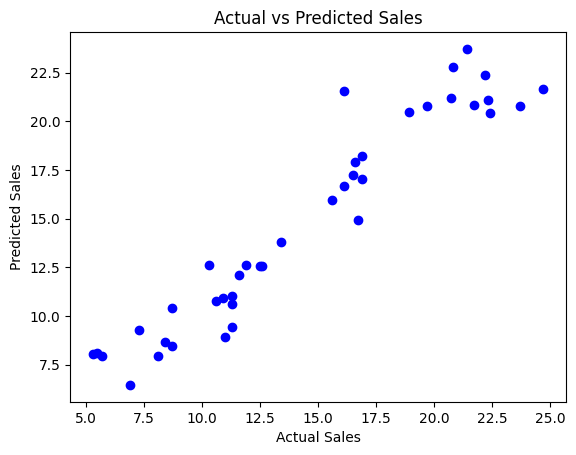

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = model.predict(X_test)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()
